In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [8]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((135, 4), (135,))

((15, 4), (15,))

In [11]:
X_dev, X_val, y_dev, y_val = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=42
)
X_dev.shape, y_dev.shape
X_val.shape, y_val.shape

((121, 4), (121,))

((14, 4), (14,))

In [12]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
X_dev = feature_scaler.fit_transform(X_dev, y_dev)
X_val = feature_scaler.transform(X_val)
X_test = feature_scaler.transform(X_test)

In [15]:
from tensorflow import keras

model = keras.models.Sequential(
    [
        keras.layers.Dense(50, activation="relu", input_shape=X_dev.shape[1:], name="hidden1"),
        keras.layers.Dense(30, activation="relu", name="hidden2"),
        keras.layers.Dense(3, activation=keras.activations.softmax, name="output"),
    ]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 50)                250       
_________________________________________________________________
hidden2 (Dense)              (None, 30)                1530      
_________________________________________________________________
output (Dense)               (None, 3)                 93        
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


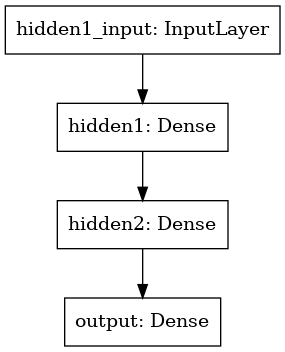

In [17]:
keras.utils.plot_model(model)

In [18]:
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    metrics=keras.metrics.sparse_categorical_accuracy,
)

In [21]:
import time
from pathlib import Path

tensorboard_dir = Path() / ".tensorboard"
tensorboard_dir.mkdir(parents=True, exist_ok=True)
run_dir = tensorboard_dir / time.strftime("run_%y_%m_%d_%H_%M_%S")
run_dir.absolute()

PosixPath('/media/girish/HDD/code_repos/bitbucket/repos/machine_learning/hands_on_ml_book/10_artificial_neural_networks/.tensorboard/run_21_01_07_16_42_37')

In [22]:
tensorboard_cb = keras.callbacks.TensorBoard(run_dir)

In [23]:
progress_cb = keras.callbacks.ProgbarLogger(count_mode="steps")

In [24]:
history = model.fit(
    X_dev,
    y_dev,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[tensorboard_cb, progress_cb],
)

Epoch 1/10
4/4 [==============================] - 1s 285ms/step - loss: 0.9735 - sparse_categorical_accuracy: 0.6813 - val_loss: 1.0039 - val_sparse_categorical_accuracy: 0.7143
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 0.9657 - sparse_categorical_accuracy: 0.6740 - val_loss: 1.0007 - val_sparse_categorical_accuracy: 0.7143
Epoch 3/10
4/4 [==============================] - 0s 18ms/step - loss: 0.9776 - sparse_categorical_accuracy: 0.6626 - val_loss: 0.9975 - val_sparse_categorical_accuracy: 0.7143
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.9585 - sparse_categorical_accuracy: 0.6917 - val_loss: 0.9944 - val_sparse_categorical_accuracy: 0.7143
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.9692 - sparse_categorical_accuracy: 0.6438 - val_loss: 0.9912 - val_sparse_categorical_accuracy: 0.7143
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.9659 - sparse_categorical_accuracy: 0.661